# Linear Regression Project

**This is a Capstone Project of Pierian Data's Python for Machine Learning & Data Science Masterclass. In this project, I am going to `clean the dataset`, `handling missing data`, perform `feature engineering`, and finally build a linear regression machine learning model.**

The project is for learning data preparation using `pandas`, `numpy` and `seaborn`, as well as buiding linear regression model using `scikit-learn`.
The final goal is to create a Linear Regression Model, train it on the data with the optimal parameters using a grid search, and then evaluate the model's capabilities on a test set.

# Data Praperation and Feature engineering

In the upcoming section, I will be focusing on **data preparation**, **cleaning**, and **feature engineering** tasks with our raw dataset.

Initially, I will concentrate on outlier detection and handling, specifically in relation to our target feature, 'SalePrice'.

Subsequently, I will address missing data issues to ensure the dataset's cleanliness and usability.

Finally, I will work on handling categorical data. Based on whether the categories are ordinal or nominal, I will encode them appropriately, enabling the data to be compatible with machine learning model training.

## Dealing with Outliers
In this section, I will prepare the data by visualing data, figuring out outliers, and clean and drop outliers to get a cleaner dataset.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ames Data Set

First explore extreme outliers in our Ames Housing Data Set

The dataset I use for this project:

* Ames Iowa Data Set: http://jse.amstat.org/v19n3/decock.pdf

In [2]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

Bofore dealing with the outlier in the target feature, I'd like to have a basic intuition of the distribution of numeric data.
For visualizing individual columns to see distribution and outliers, boxplots are very useful. I will loop over the dataframe columns and plot a boxplot for each numeric value.

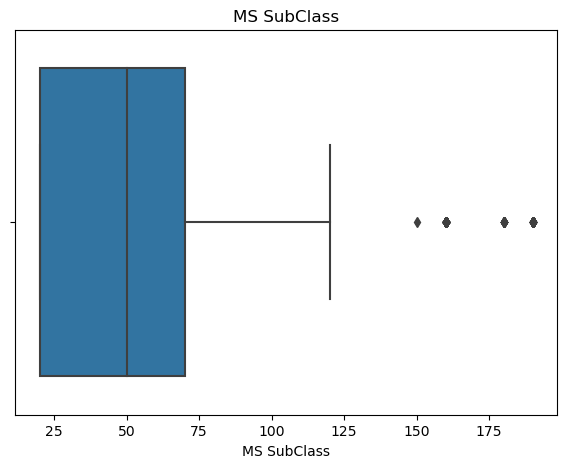

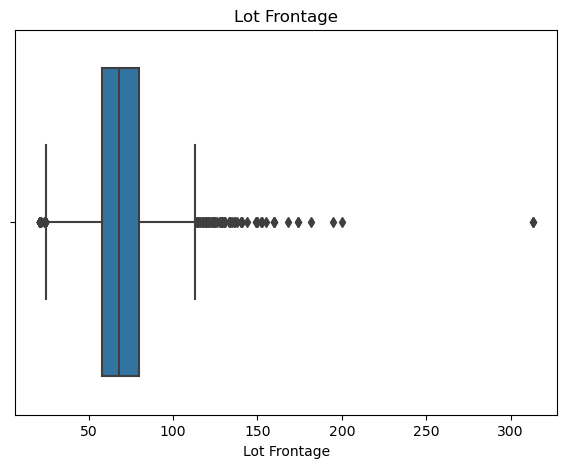

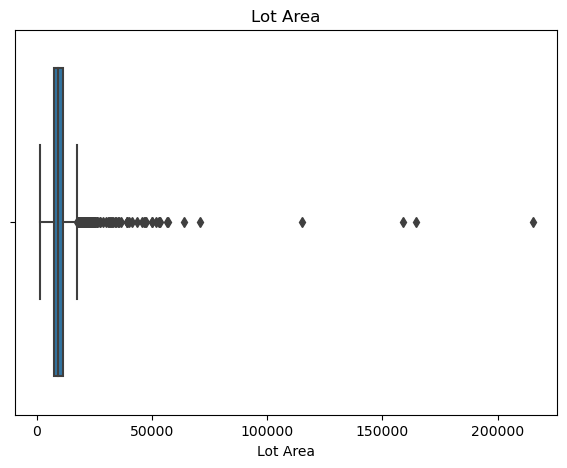

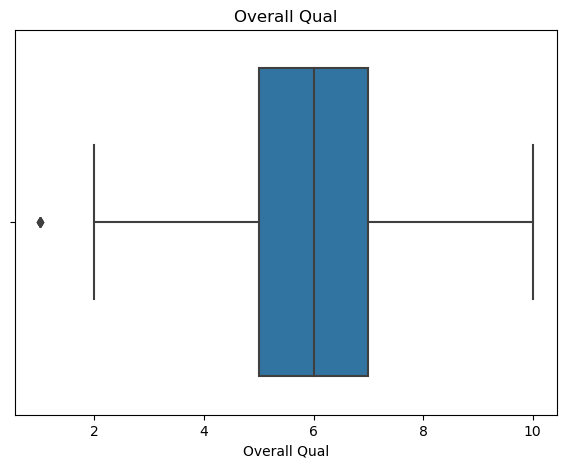

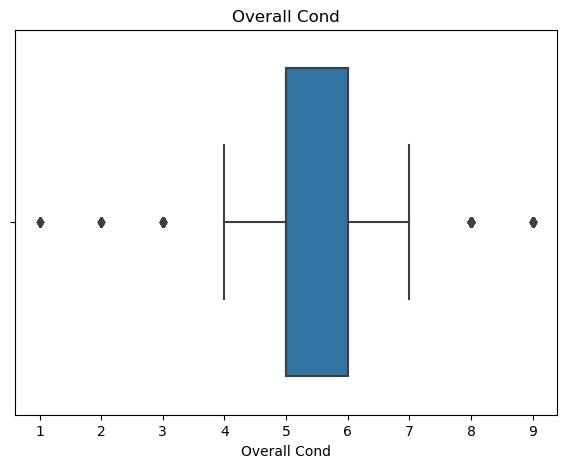

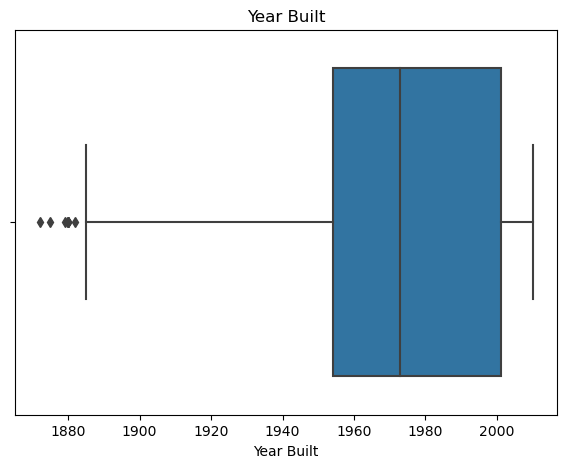

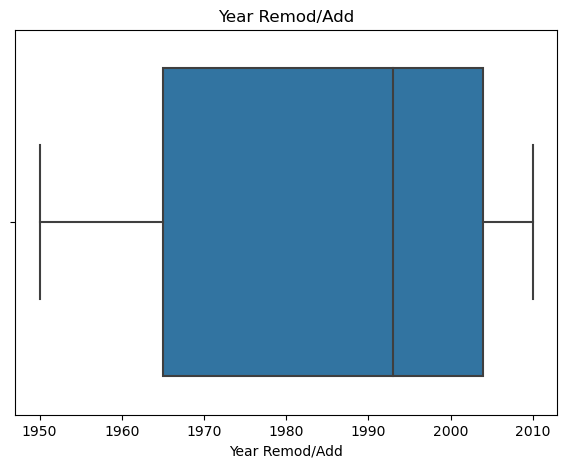

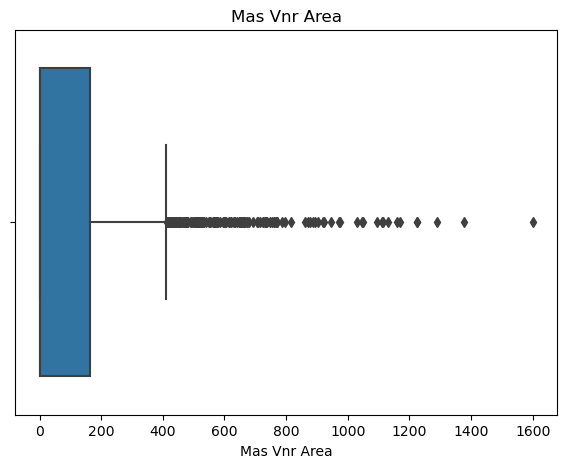

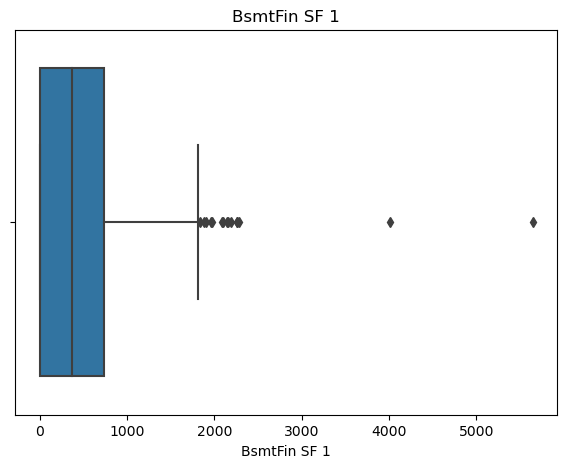

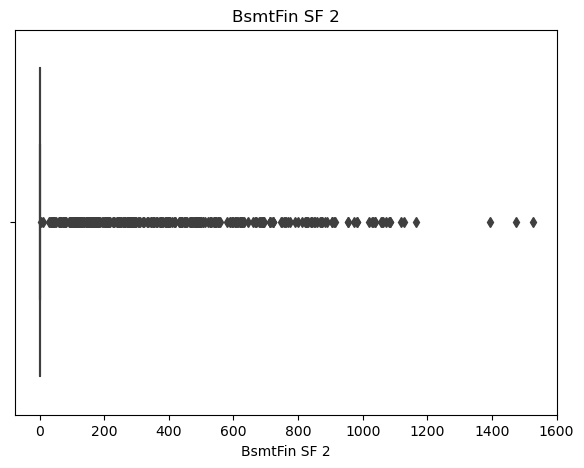

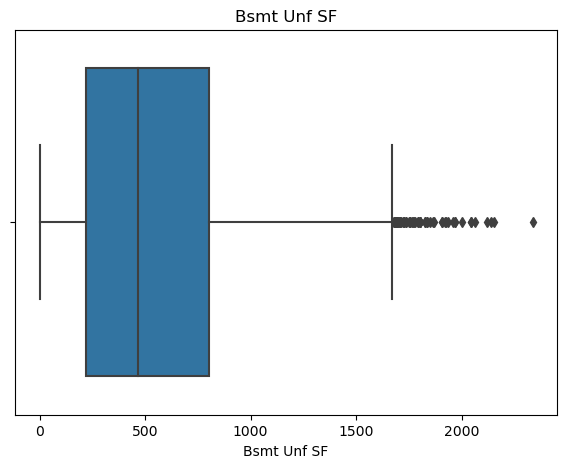

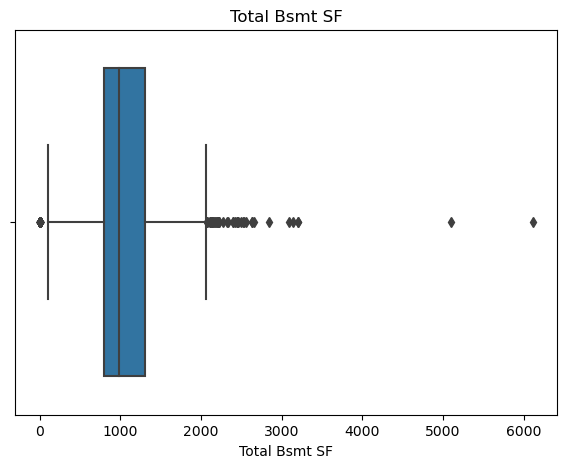

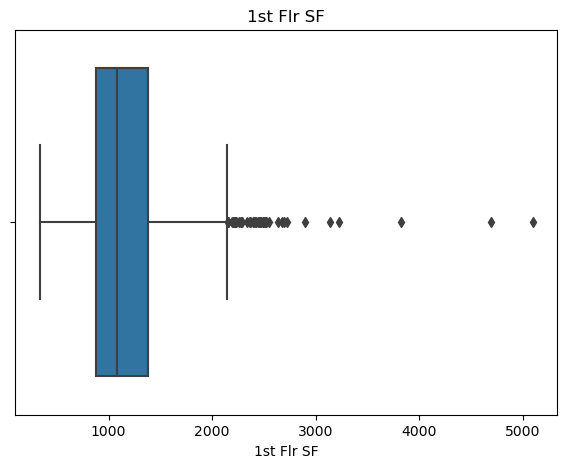

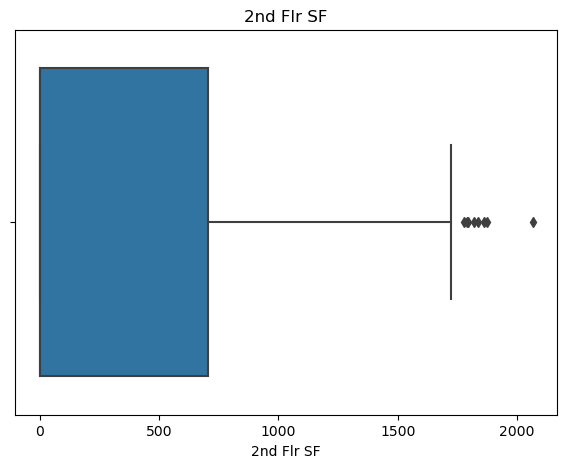

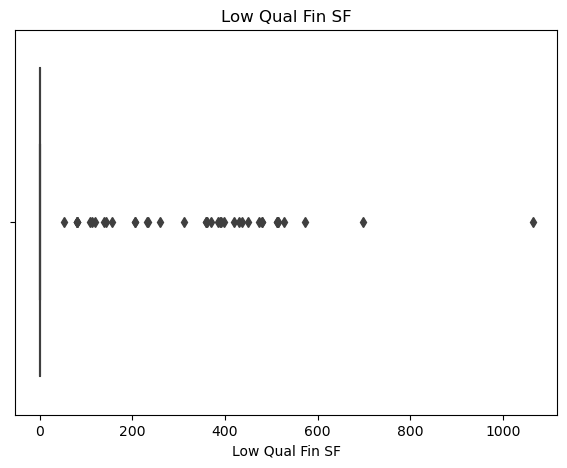

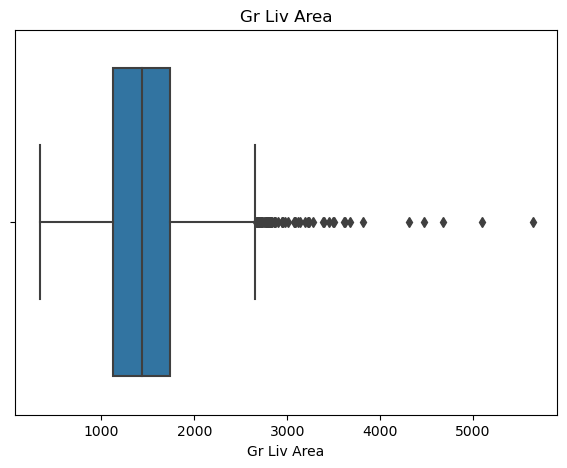

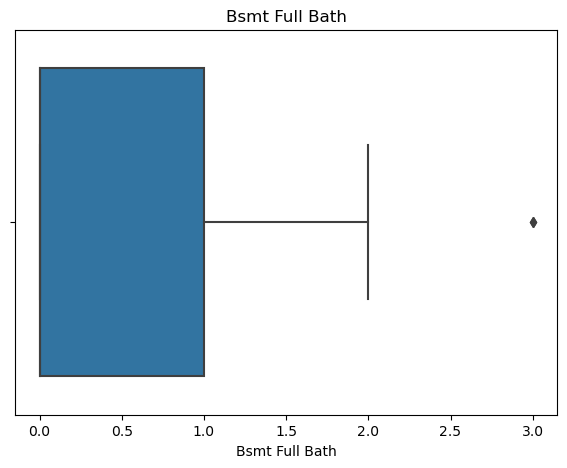

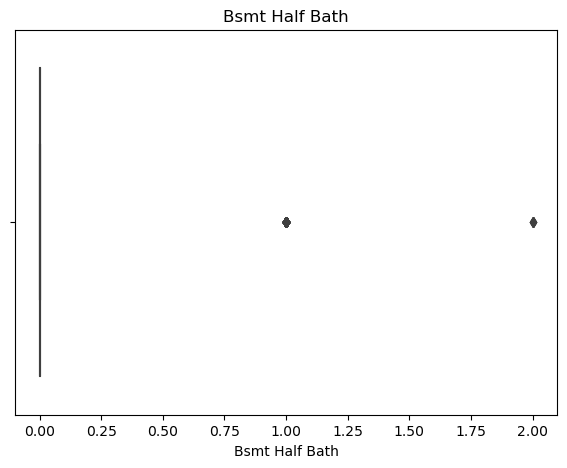

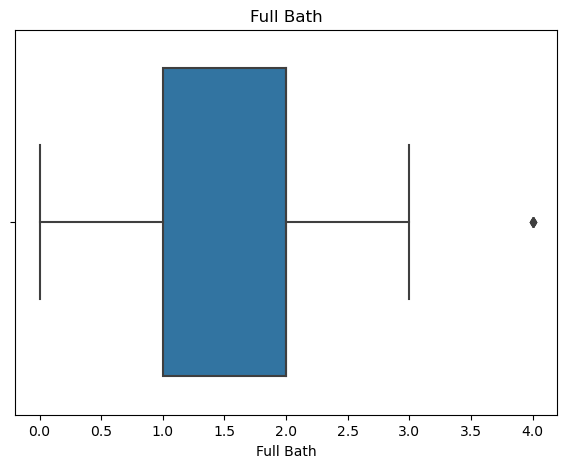

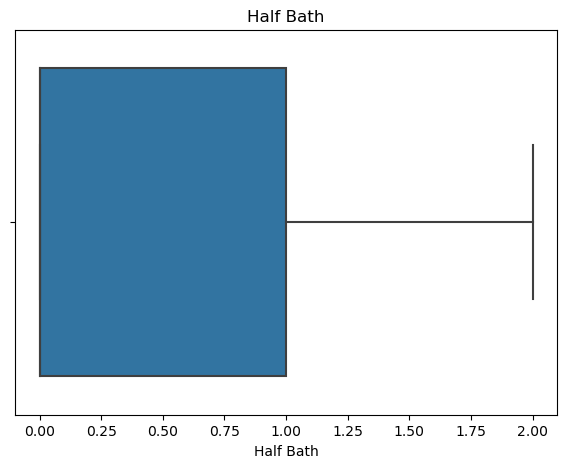

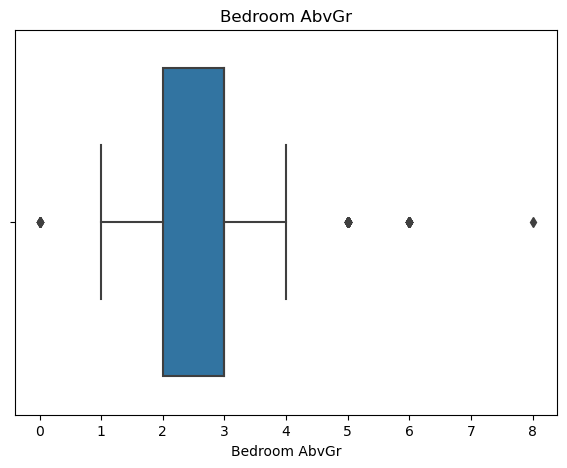

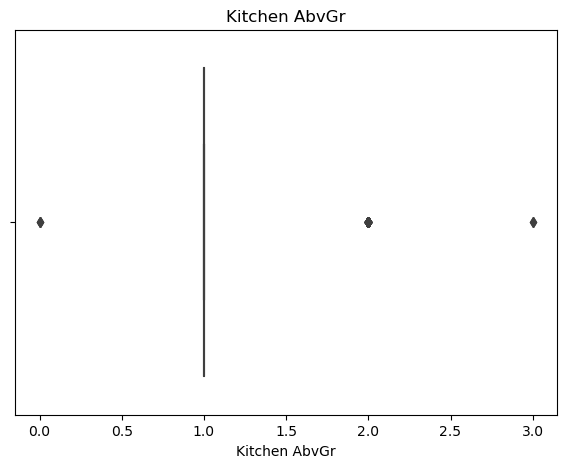

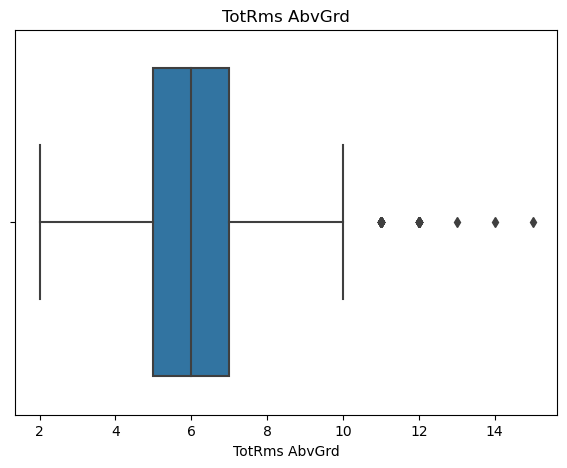

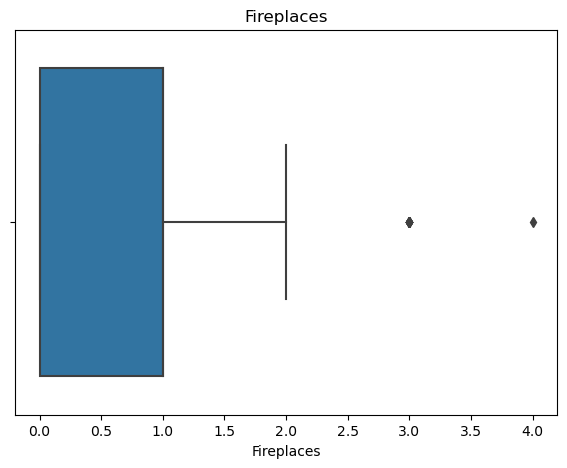

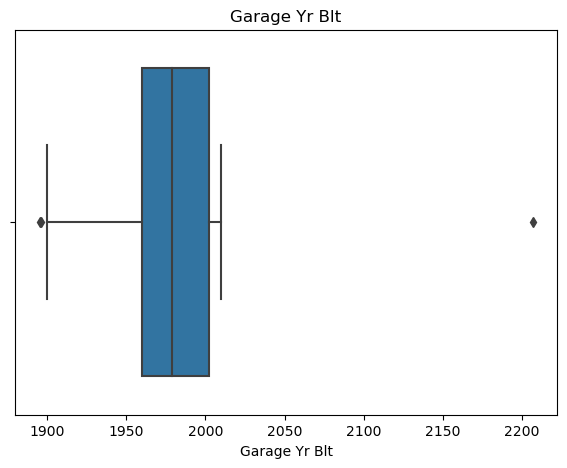

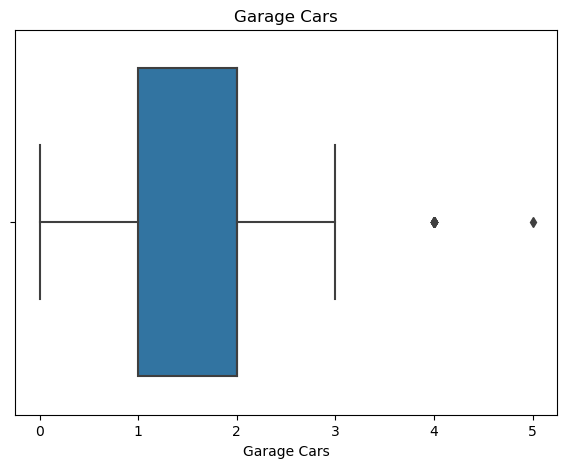

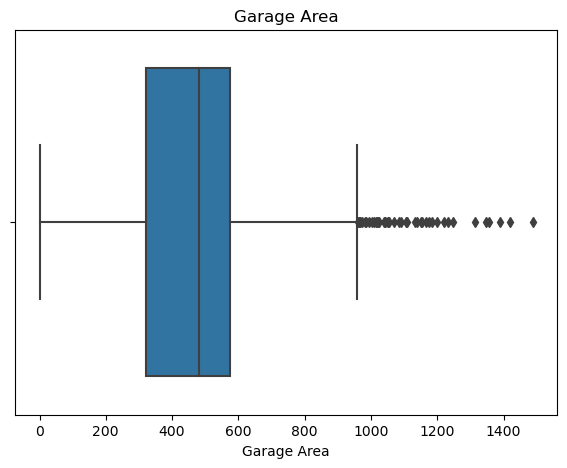

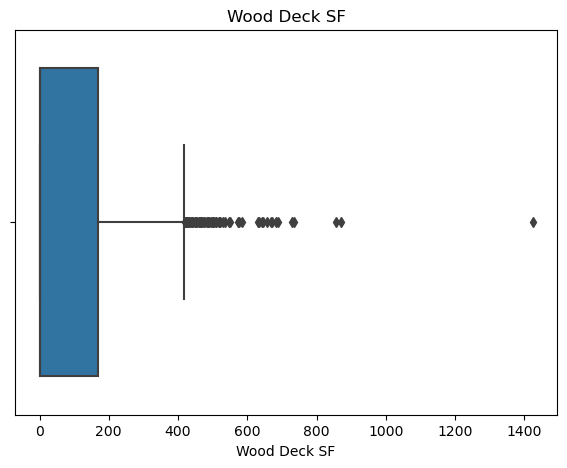

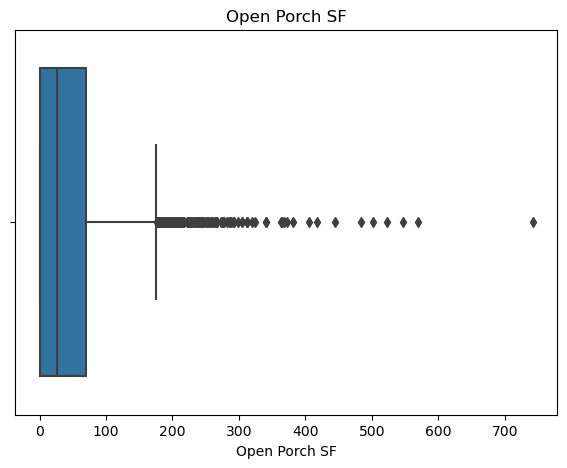

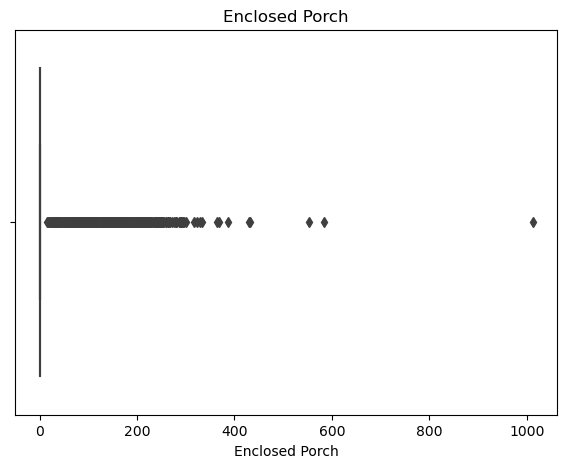

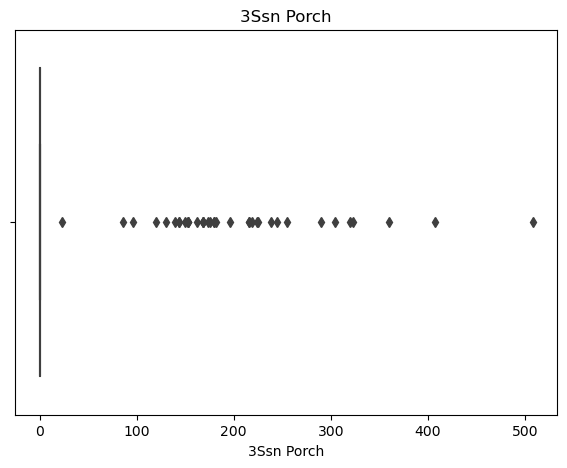

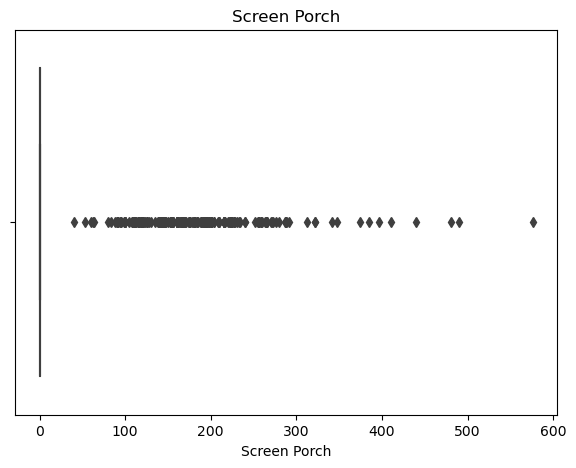

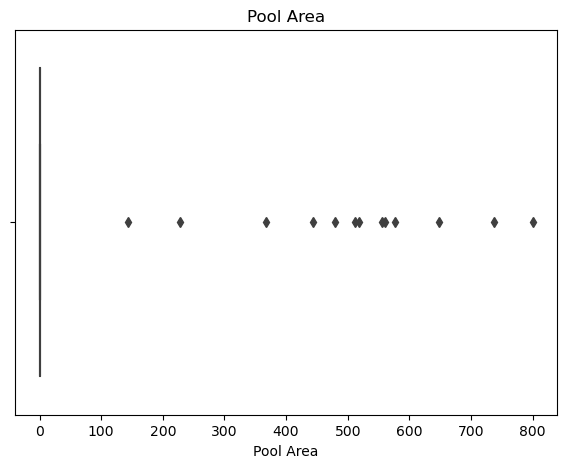

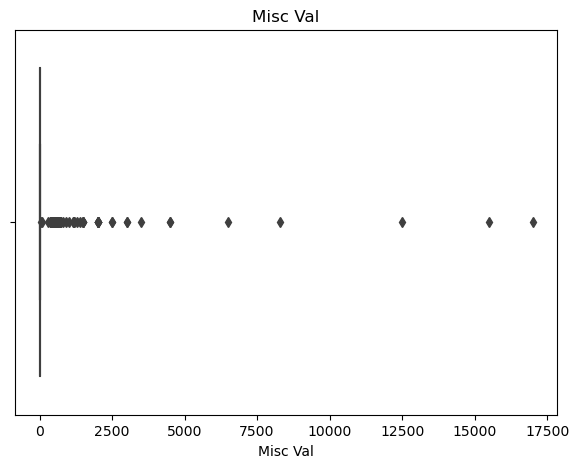

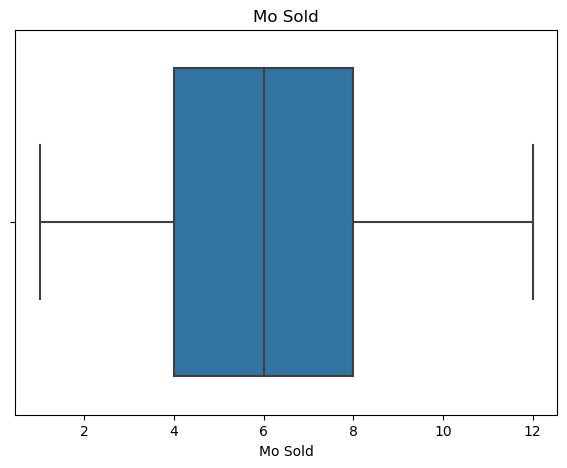

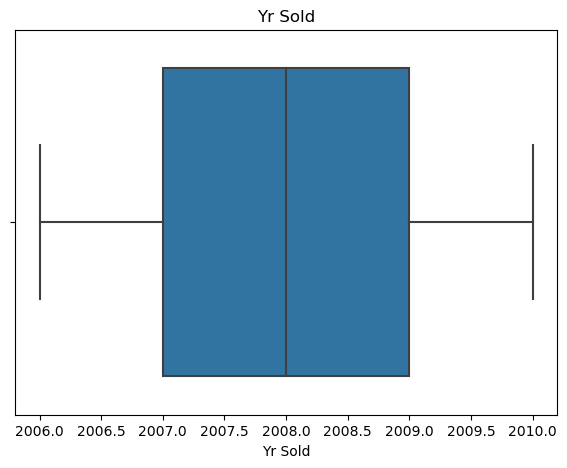

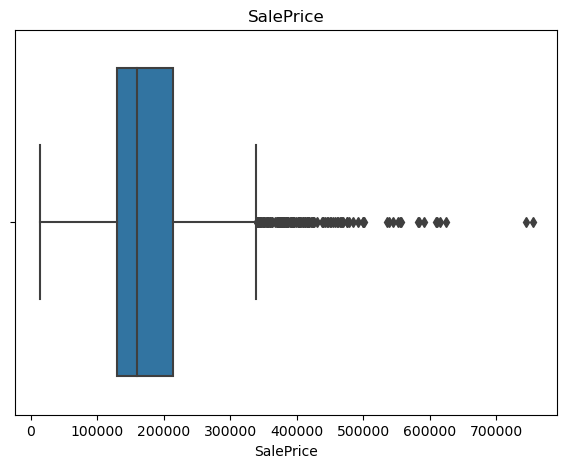

In [5]:
for col in df.drop(columns=["PID"]):
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        plt.figure(figsize=(7,5))
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

## Check relationship between target `SalePrice` and features

This dataset encompasses 81 columns. Although a comprehensive cleaning of each column could be done to eliminate outliers, it may become overly complicated. Our primary focus is the 'SalePrice' feature, which is used as the target label in our machine learning model. Thus, we will primarily address outliers based on the 'SalePrice' column, only focus on features that are highly related to sale price. It should be noted that upon model deployment, we will explicitly specify that the model is tailored to function within a particular range of features that we have touched.

First I'll check the correlation of features, especially the correlation between SalePrice and other featrues:

<Axes: >

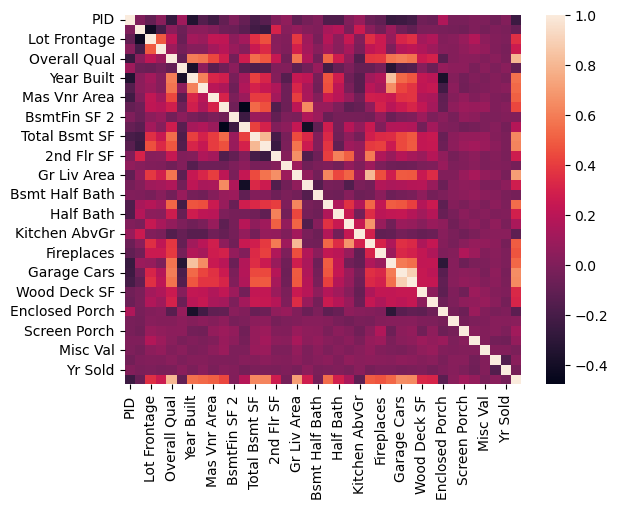

In [6]:
sns.heatmap(df.corr(numeric_only=True))

In [7]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<Axes: xlabel='SalePrice', ylabel='Count'>

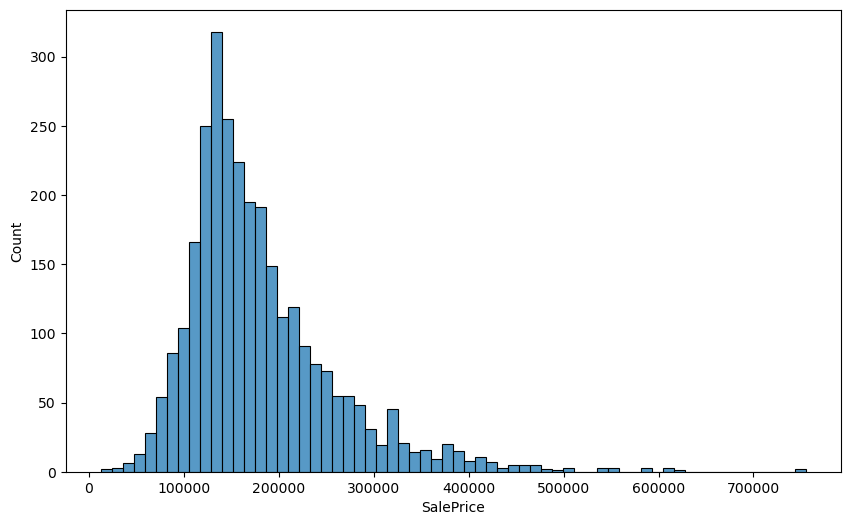

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df["SalePrice"])

<Axes: >

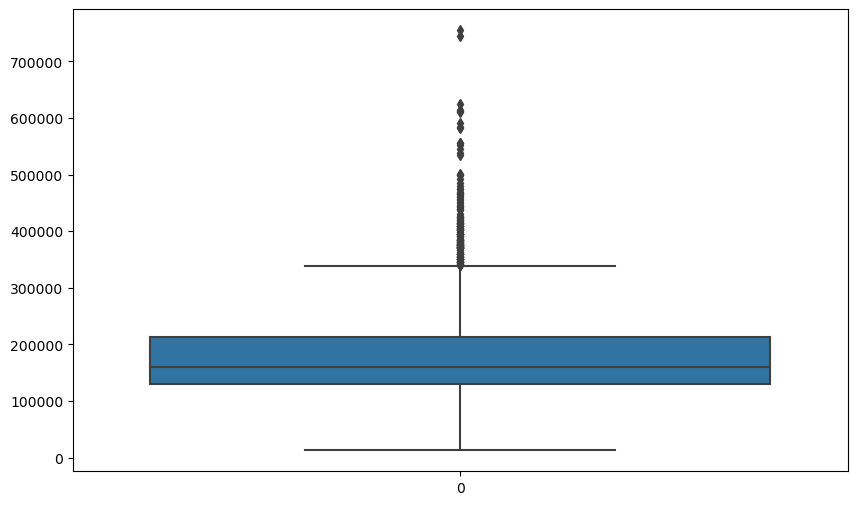

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(df["SalePrice"])

## FInd out outliers base on relationship and domain knowledge

Utilizing domain knowledge and the observed correlations from the data, we anticipate that houses with superior overall quality and larger areas command higher prices. In this section, I will examine whether this relationship holds true even for extremely high quality and large area homes. This analysis will provide insights into which outliers may need to be removed from our dataset.

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

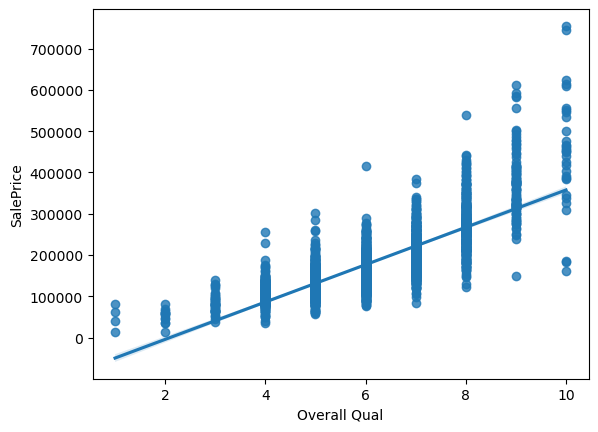

In [10]:
sns.regplot(x='Overall Qual',y='SalePrice',data=df)

It is worth noting that as the scatter plot shows, when the distribution of sale price start to become more sparse when overall quality gets larger.
We can even check these outliers where the quality is high while the price is low

In [11]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: >

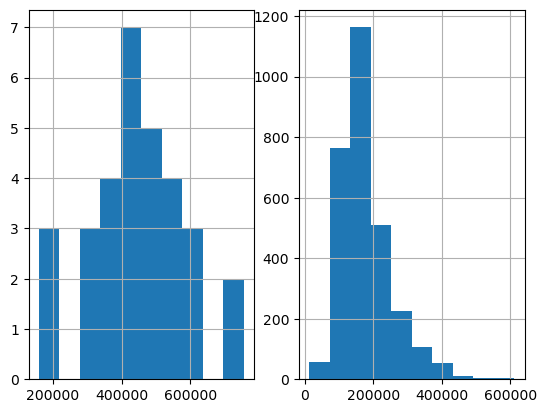

In [12]:
plt.subplot(1,2,1)
df[(df['Overall Qual']>9)]['SalePrice'].hist()
plt.subplot(1,2,2)
df[(df['Overall Qual']<=9)]['SalePrice'].hist()

Similar thing happens when living area is high:

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

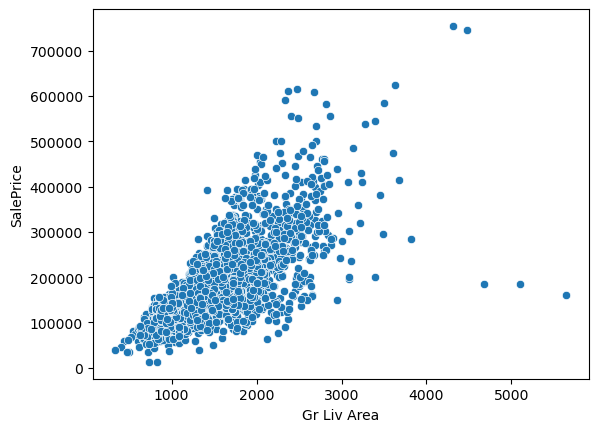

In [13]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

As the above figure shows, the relationship between living area and sale price starts to loss its linearity when living area gets larger.
We can check these rows as well

In [14]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


**interestingly, index 1498, 2180 and 2181 are outliers in both conditions. So I will treate them as outliers and drop them**

## Drop outliers
**Consequently, I will exclude those outliers from the dataset where the overall quality and area is high, yet the price is low(index 1498, 2180 and 2181). 
Following model deployment, it is essential to explicitly state that the model's precision may diminish for homes with exceptionally high values for area or overall quality, due to the fact that some points are droped.**

In [15]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

In [16]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [17]:
df = df.drop(ind_drop,axis=0)

Now I'll check if the outliers are removed:

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

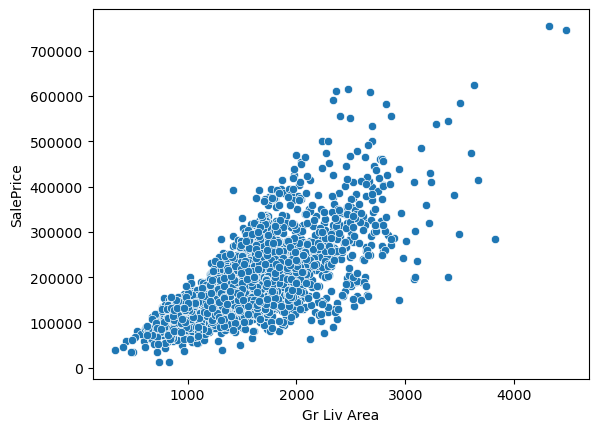

In [18]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

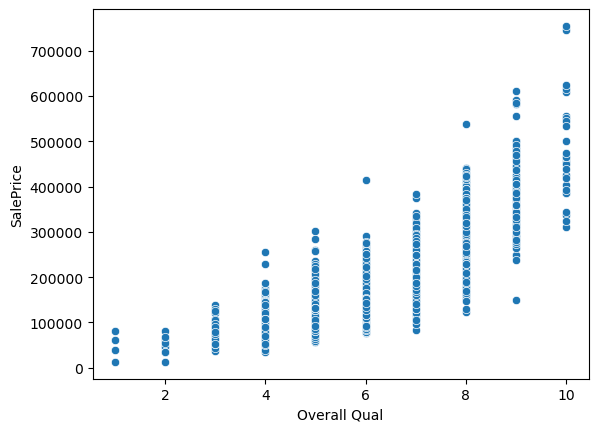

In [19]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

# Dealing with Missing Data

In this section, I will deal with missing data in the dataset using `pandas`

First, I will **evaluate** how much data is missing. Then, I will **fill or drop** data based on missing values. Finally, I will **fix** some data based on rows.

Before doing any cleaning, I will first checkout the document text of the data set:

In [20]:
with open("Ames_Housing_Feature_Description.txt", 'r') as fh:
    print(fh.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Evaluate missing data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

There's no missing value for PID, I could use PID as index, but I decide to simply drop it.

In [22]:
df = df.drop(columns=["PID"])

To better understand missing values in this dataset, I will first visualize the missing data in a matrix:

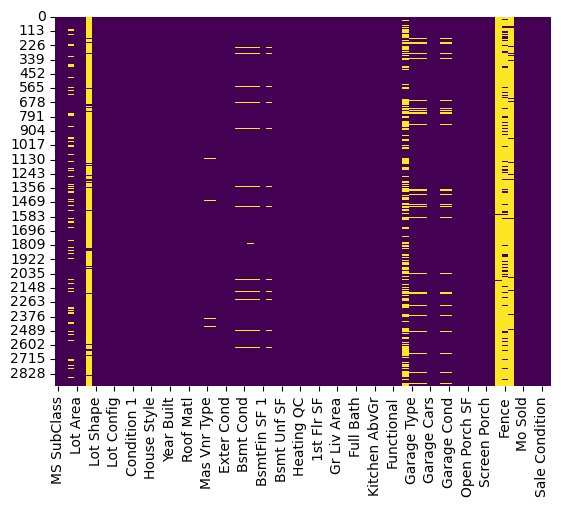

In [23]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [24]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [25]:
percent_nan = percent_missing(df).sort_values(ascending=False)

In [26]:
percent_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Yr Blt      5.432183
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Type       0.785787
Mas Vnr Area       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Garage Area        0.034165
Garage Cars        0.034165
BsmtFin SF 2       0.034165
BsmtFin SF 1       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Electrical         0.034165
dtype: float64

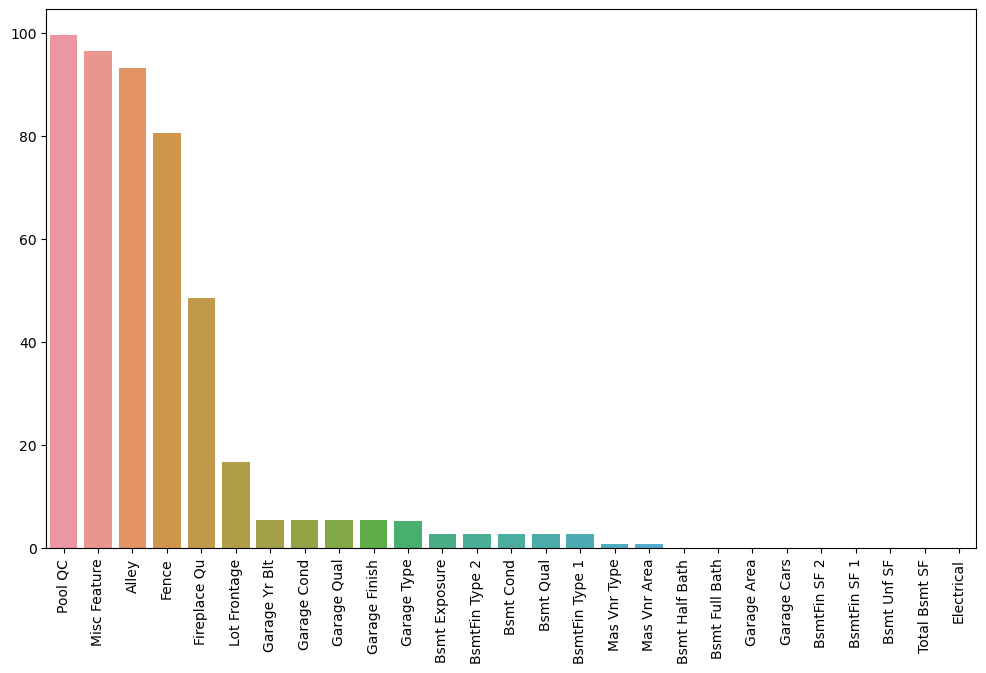

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

## Fill or drop missing data

Now I will fill or drop missing data. I will first consider filling columns that don't have a lot of missing data. Then I will fill or drop columns that most if it's data is missing.
The metadata will be referenced throughout the process

Before droping rows, by checking documentation, I notice that null for Bsmt may have special meaings for Null:

> BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
> BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
       
In this instance, discarding these records may not be advisable. Instead, for numerical fields related to the basement, I will replace any 'NA' values with '0', and for string fields, I will replace 'NA' with 'None'.

In [28]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

In [29]:
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
df[bsmt_str_cols] = df[bsmt_str_cols].fillna("None")

In [30]:
percent_nan = percent_missing(df).sort_values(ascending=False)

### Drop rows
After filling NA for basements, I will focus on features that only have less than 1% of data missing.
For these data, I can drop several rows with missing data as it won't lead to a huge data loss

(0.0, 1.0)

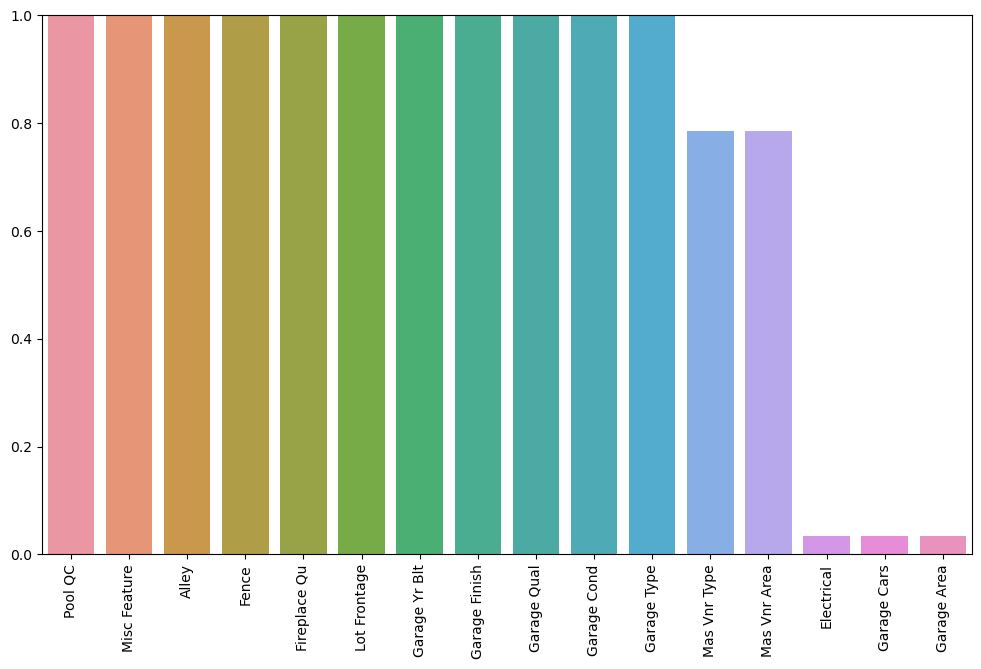

In [31]:
plt.figure(figsize=(12,7))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [32]:
percent_nan[percent_nan < 1]

Mas Vnr Type    0.785787
Mas Vnr Area    0.785787
Electrical      0.034165
Garage Cars     0.034165
Garage Area     0.034165
dtype: float64

In [33]:
len(df) * 0.034165 / 100

1.0000095500000001

In [34]:
percent_nan[percent_nan < 1].index[2:]

Index(['Electrical', 'Garage Cars', 'Garage Area'], dtype='object')

This shows that for 'Electrical', 'Garage Cars', 'Garage Area', only one row is missing.

In [35]:
missing_row = []
for col in percent_nan[percent_nan < 1].index[2:]:
    missing_row.append(df[df[col].isna()].index)

{i[0] for i in missing_row}

{1577, 2236}

In [36]:
missing_row = []
for col in percent_nan[percent_nan < 1].index:
    missing_row.append(df[df[col].isna()].index)

{i[0] for i in missing_row}

{55, 1577, 2236}

A modest adjustment of just three rows - specifically rows 1577, and 2236 - effectively eliminates all missing data in columns where the missing data is less than 1% except Mas Vnr Type and Mas Vnr Area.
As I double confirm that NA has no meaning for Garage, droping row {1577, 2236} is a good idea.

In [37]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [38]:
percent_nan = percent_missing(df).sort_values(ascending=False)

(0.0, 1.0)

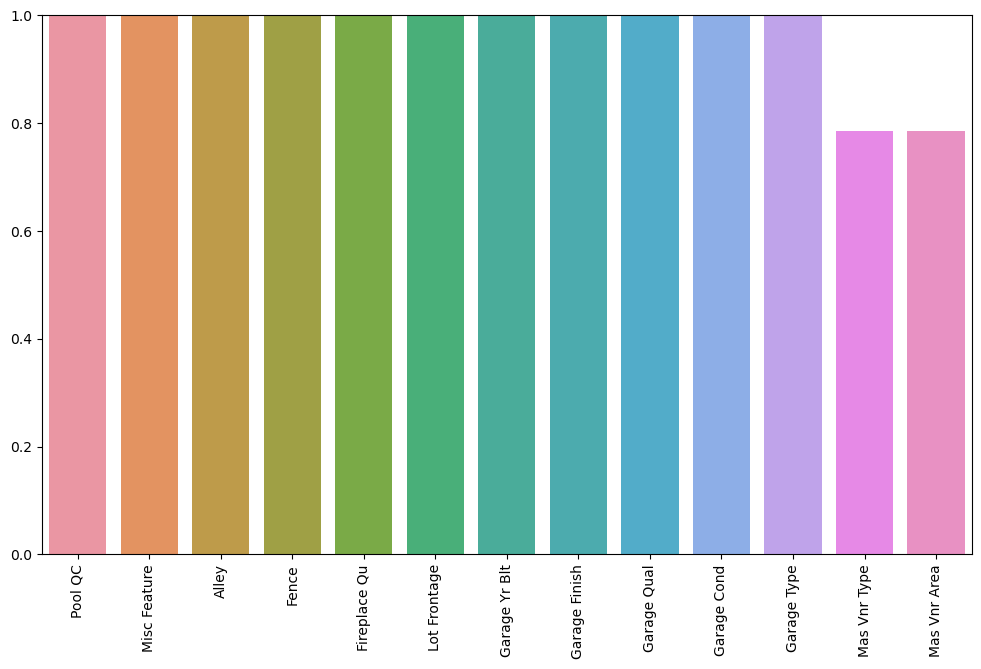

In [39]:
plt.figure(figsize=(12,7))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Mas Vnr Feature 
While it's feasible to remove row 55 to eliminate null values in 'Mas Vnr', this may not be the best approach. According to the accompanying Description Text File, although 'NA' for 'Mas Vnr' isn't clearly defined, it's plausible that 'NA' in both 'Mas Vnr Type' and 'Mas Vnr Area' indicates the absence of a masonry veneer in the house. Therefore, akin to our previous strategy, we'll substitute these missing values appropriately.

In [40]:
df.loc[[55],["Mas Vnr Type", "Mas Vnr Area"]]

,Mas Vnr Type,Mas Vnr Area
55,NaN,NaN


In [41]:
df["Mas Vnr Type"].fillna("None", inplace=True)
df["Mas Vnr Area"].fillna(0, inplace=True)

In [42]:
percent_nan = percent_missing(df).sort_values(ascending=False)

(0.0, 1.0)

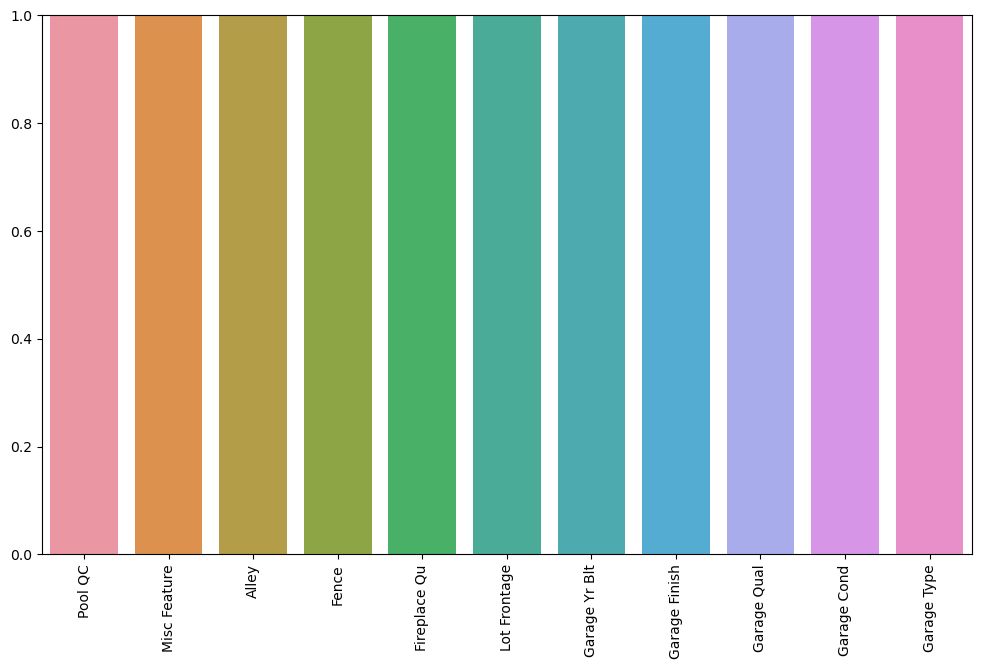

In [43]:
plt.figure(figsize=(12,7))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

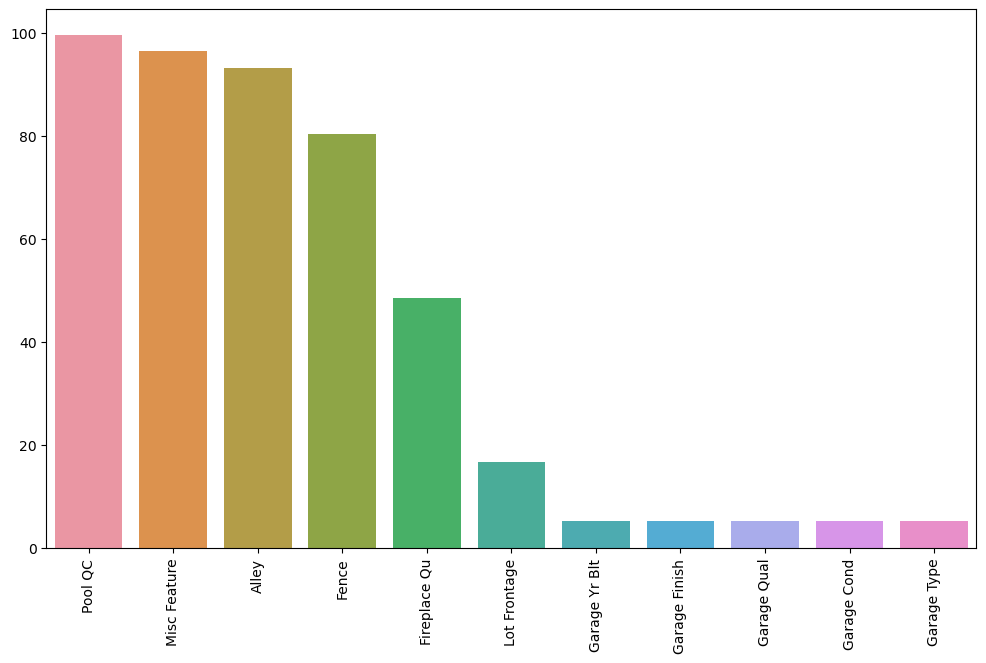

In [44]:
plt.figure(figsize=(12,7))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

# Filling In Missing Column Data

The previous strategies primarily targeted rows with missing data. Now, I'm shifting focus towards column features, given that a larger proportion of data seems to be missing from these areas.

### Filling Garage Columns

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [45]:
df.loc[df['Garage Type'].isna(), ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
27,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN
...,...,...,...,...
2913,NaN,NaN,NaN,NaN
2916,NaN,NaN,NaN,NaN
2918,NaN,NaN,NaN,NaN
2919,NaN,NaN,NaN,NaN


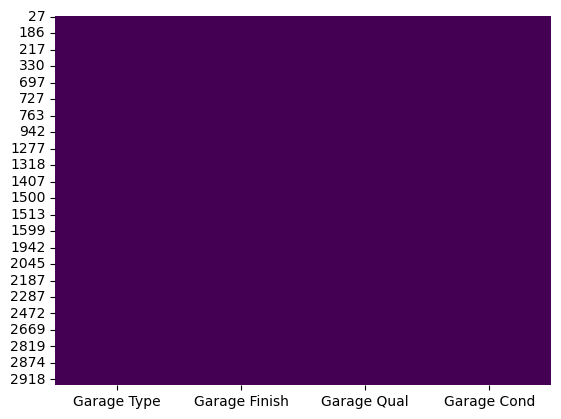

In [46]:
sns.heatmap(df.loc[df['Garage Type'].isna(), ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']].isnull(), cbar=False, cmap='viridis')
plt.show()

The above dataframe and heatmap confirm a consistent pattern of missing garage values across all columns, suggesting that the occurrence of NaN likely indicates the absence of a garage.

In [47]:
values = {'Garage Type':"None", 'Garage Finish':"None", 'Garage Qual':"None", 'Garage Cond':"None","Garage Yr Blt":0 }

In [48]:
df.fillna(value=values,inplace=True)

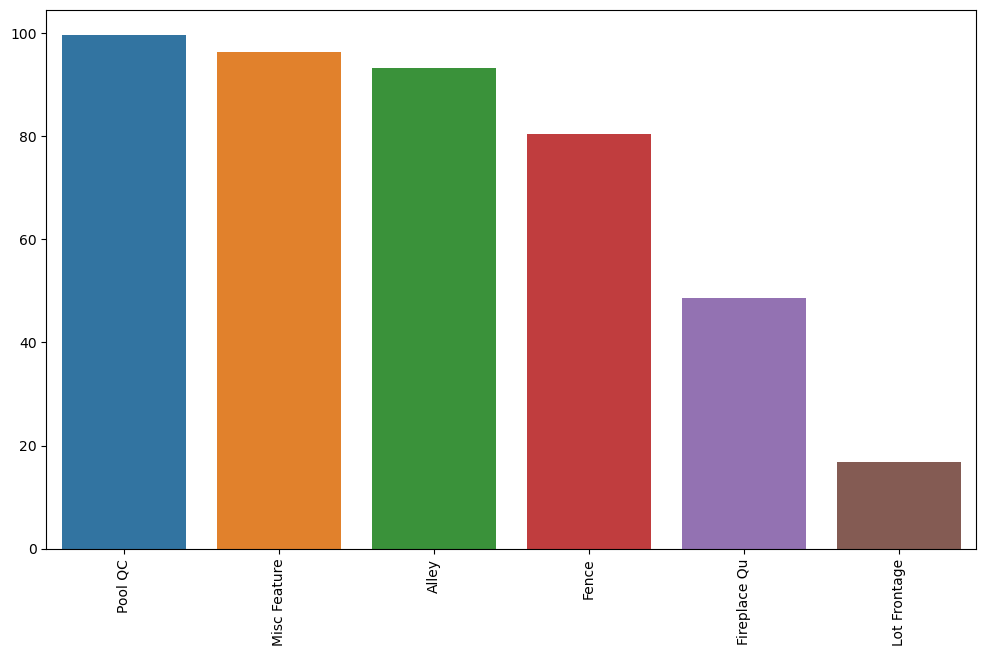

In [49]:
percent_nan = percent_missing(df).sort_values(ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

## Dropping Feature Columns

In cleaning the remaining features, it's worth noting that the majority of the data for some of them is missing. These won't be particularly predictive because the data points are predominantly absent.

Although in our specific dataset, many of these high-percentage NaN features could simply serve as placeholders for "none" or 0, for the purpose of exploring different approaches to handling missing data, I've decided to eliminate these features rather than filling them with an appropriate value.

In [50]:
percent_nan.index

Index(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage'],
      dtype='object')

In [51]:
df[percent_nan.index[:4]]

,Pool QC,Misc Feature,Alley,Fence
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,MnPrv
2,NaN,Gar2,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,MnPrv
...,...,...,...,...
2925,NaN,NaN,NaN,GdPrv
2926,NaN,NaN,NaN,MnPrv
2927,NaN,Shed,NaN,MnPrv
2928,NaN,NaN,NaN,NaN


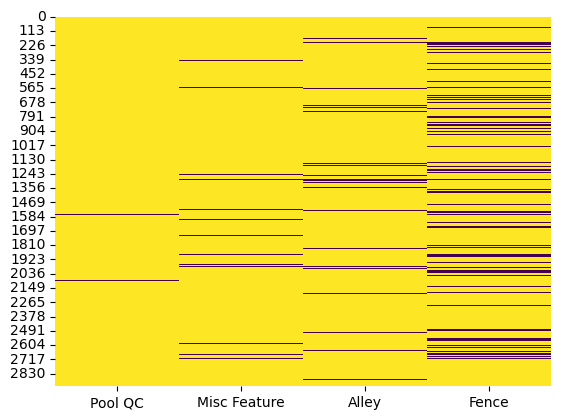

In [52]:
sns.heatmap(df[percent_nan.index[:4]].isna(), cbar=False, cmap='viridis')
plt.show()

In [53]:
df.drop(columns=percent_nan.index[:4], inplace=True)

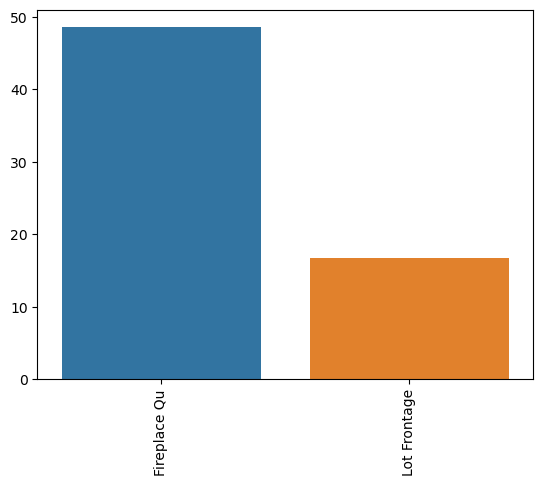

In [54]:
percent_nan = percent_missing(df).sort_values(ascending=False)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

### Filling in Fireplace Quality based on Description Text

Basing on Description of Fireplace Qu:

> FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

We can just change NA to None

In [55]:
df['Fireplace Qu'].fillna("None", inplace=True)

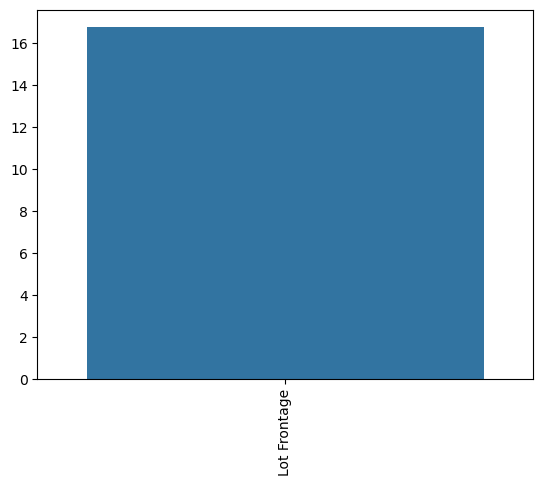

In [56]:
percent_nan = percent_missing(df).sort_values(ascending=False)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

# Imputation of Missing Data

In the following analysis, our strategy hinges on the value of the neighborhood feature. The description text, which I've copied below for reference, provides useful context:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

Our approach is rooted in a domain knowledge assumption that the amount of property street frontage, that is, the linear feet of street connected to the property, is likely influenced by its neighborhood. Thus, we can infer that the neighborhood can be used to fill in missing frontage data.

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [57]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

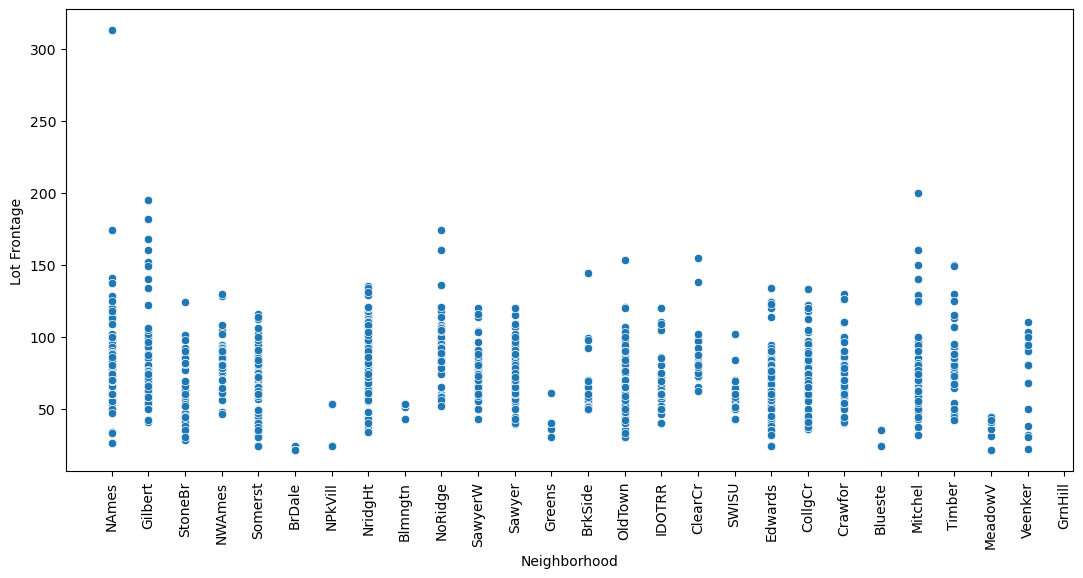

In [58]:
plt.figure(figsize=(13,6))
sns.scatterplot(y='Lot Frontage',x='Neighborhood',data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

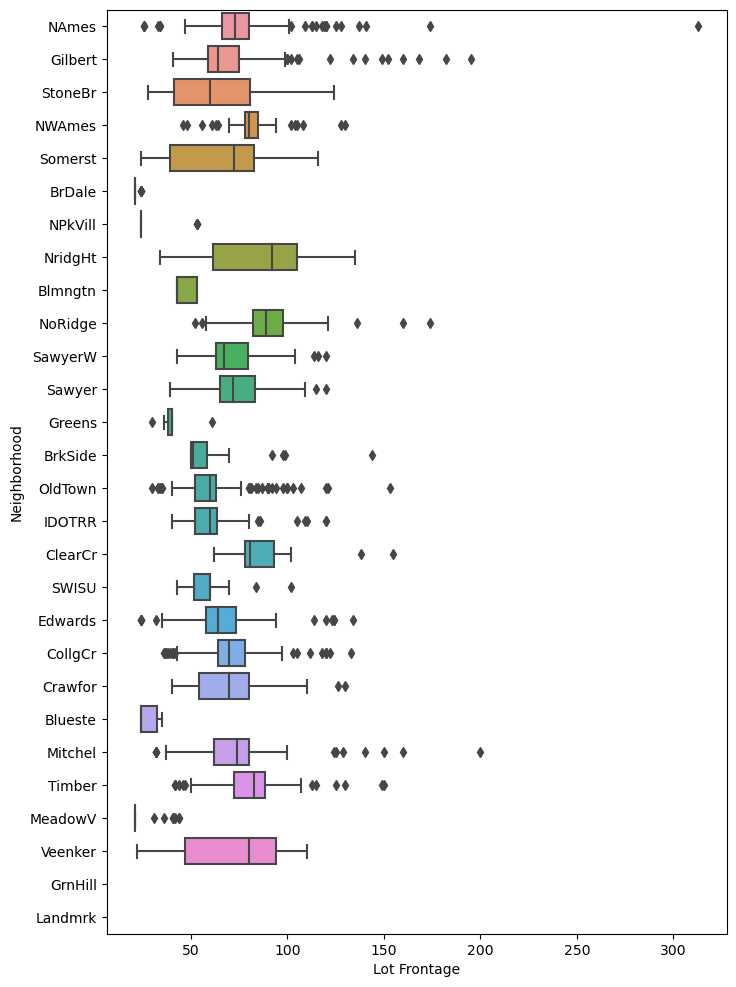

In [59]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [60]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [61]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [62]:
df['Lot Frontage'].isna().sum()

3

Now we have the last 3 missing values. For now as we have no other better assumption to make, I will just fill zero to the three rows:

In [63]:
df['Lot Frontage'].fillna(0, inplace=True)

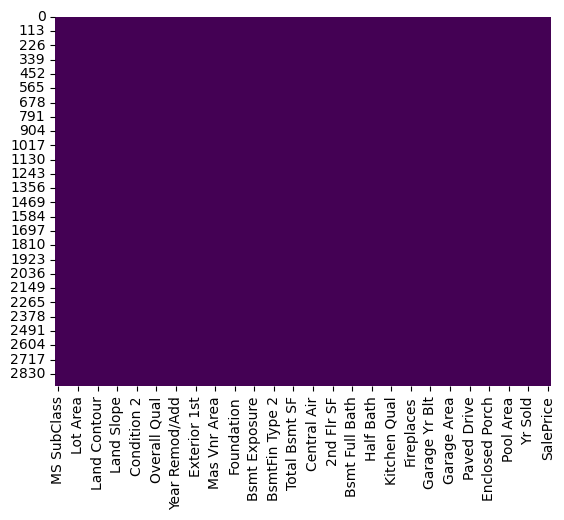

In [64]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# Dealing with Categorical Data

After handling all missing data, it's time to convert categorical data.

Linear regression models can not deal with categorical data set as strings. Instead we need to convert these categories into "dummy" variables, otherwise known as "one-hot" encoding.
For Ordinal Data, it also make sense to simply convert them into ordinal ints.

## Converting Numerical Columns to Categorical

It's essential to apply thoughtful consideration when encoding categories numerically. We must ensure that the numerical representation of categories respects a meaningful relationship, especially for model interpretation. In our dataset, several features appear as numerical values, but their true nature is categorical. Hence, we will also need to apply one-hot encoding to these features, thereby retaining their categorical essence.

MSSubClass, for example, use a numerical coding, but the order/scale of numbers has no meaning. In this case, it makes more sense to chante it into one hot coding

In this case, we first change it's data type to string so that we won'd miss it.

In [65]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   object 
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

In [67]:
df_obj = df.select_dtypes(include='object')

In [68]:
df_num = df.select_dtypes(exclude="object")

In [69]:
# sanity check
df_obj.dtypes

MS SubClass       object
MS Zoning         object
Street            object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Sale Type         object
Sale Condition    object


In [70]:
df_num.dtypes

Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Yr Sold              int64
SalePrice            int64
dtype: object

In [71]:
df_obj_dummies = pd.get_dummies(df_obj, drop_first=True)

In [72]:
df_obj_dummies.shape

(2925, 238)

In [73]:
df_f = pd.concat([df_num, df_obj_dummies], axis=1)

In [74]:
df_f.shape

(2925, 274)

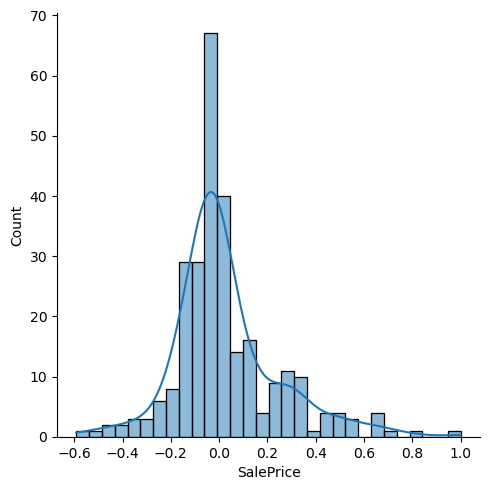

In [75]:
sns.displot(df_f.corr()['SalePrice'].sort_values(), kde=True)

Clearly, many features exhibit a weak correlation with Price. In the forthcoming steps, we can efficiently eliminate these using LASSO regularization.

# Traning Linear Model

As illustrated above, a significant number of features display a weak correlation with Price. Consequently, employing linear regression with regularization becomes more beneficial.

I will use ElasticNet model for this task with cross validation

## Prepare Data

First, I will separate out the data into X features and y labels

In [76]:
X = df_f.drop(columns="SalePrice")
y = df_f["SalePrice"]

Use scikit-learn to split up X and y into a training set and test set. Set test proportion to 10%.

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=101)

## Standardize Scaling data
The dataset features has a variety of scales and units. For optimal regression performance, I will preprocessing the X features for scaling/normalize it.

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()

In [81]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Trian Model

In accordance with the previous discussion, we'll employ the Elastic Net model, which is a linear model enhanced with regularization. While we could take advantage of `ElasticNetCV` for this purpose, to shed more light on the intricacies of cross-validation, we'll opt for utilizing the `ElasticNet` model in conjunction with `GridSearchCV`.

In [82]:
from sklearn.linear_model import ElasticNet

In [83]:
base_elastic_model = ElasticNet(max_iter=50000)

The Elastic Net model has two main parameters, alpha and the L1 ratio. Create a dictionary parameter grid of values for the ElasticNet. 

In [84]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

Using scikit-learn create a GridSearchCV object and run a grid search for the best parameters for your model based on your scaled training data. 

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid_model = GridSearchCV(
    estimator=base_elastic_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=0
)

In [ ]:
grid_model.fit(scaled_X_train, y_train)

/home/lance/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.104e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(
/home/lance/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.099e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(
/home/lance/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

 Display the best combination of parameters for your model

In [ ]:
grid_model.best_params_

## Test Model

In [ ]:
y_hat = grid_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,y_hat)
RMSE = np.sqrt(mean_squared_error(y_test,y_hat))

In [ ]:
MAE,RMSE

In [ ]:
mean_price = np.mean(df['SalePrice'])

In [ ]:
RMSE / mean_price

In [ ]:
MAE / mean_price

**For Housing price presiction, such a model with about 10% error is acceptable.**